# XGBoost

### Clasificación de eventos usando XGBoost como seleccionador de características.

-------------------------------------------------------------------------------------------------------------------------------

Alex Toro, Raquel Pezoa

## Librerias necesarias.
-------------------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
from xgboost import XGBClassifier
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [60]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [3]:
import xgboost as xgb

In [4]:
import winsound

## Lectura del set de datos reducido.

- El set original proviene de https://www.kaggle.com/competitions/higgs-boson/data.
- Separación de la variable Label de las demas variables.
-------------------------------------------------------------------------------------------------------------------------------

In [5]:
df = pd.read_csv("/Users/Alex/Downloads/Pre-procesado.csv")

### Entrenamiento y testeo del set de datos.
-------------------------------------------------------------------------------------------------------------------------------

In [6]:
X = df.drop(labels=['Label'], axis=1)
Y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.01, random_state=0)

In [7]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [8]:

classifier=XGBClassifier()

In [9]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [11]:
random_search.fit(X_train,y_train) # el de 5 iteraciones

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [12]:
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [13]:
print(random_search.best_estimator_) # 5 iteraciones

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [14]:
random_search.best_params_ # 5 iteraciones

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

### Entrenamiento y testeo del set de datos con XGBoost.

- Se entrena con XGBClassifier antes de usar SHAP, ya que SHAP necesita con aterioridad un modelo entrenado.
-------------------------------------------------------------------------------------------------------------------------------

In [7]:
model = XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
model.get_params()


{'objective': 'binary:logistic',
 'use_label_encoder': False,
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.5,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'gamma': 0.3,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.3,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 15,
 'max_leaves': 0,
 'min_child_weight': 3,
 'missing': None,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'seed': None,
 'silent': True}

In [8]:
model.fit(X_train, y_train)

[15:14:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=None, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

### Convertir los datos a  una lista de duplas

- Se convierte la matriz entregada por XGBoost junto a las columnas del dataframe en una lista de duplas.
- Se realizan las duplas para así poder reordenar las variables de la más relevante a la menos relevante.
- Se Reordena la duplas de mayor a menor.
- Se separan las duplas en listas separadas y transformar las 10 primeras en arreglos de numpy.
-------------------------------------------------------------------------------------------------------------------------------

In [9]:
l = []
for feature in zip(model.feature_importances_,X_train.columns):
    l.append(feature)
    print(feature)

(0.09820056, 'DER_mass_MMC')
(0.08670912, 'DER_mass_transverse_met_lep')
(0.04110553, 'DER_mass_vis')
(0.032647643, 'DER_pt_h')
(0.0826491, 'DER_deltaeta_jet_jet')
(0.035903137, 'DER_mass_jet_jet')
(0.024218103, 'DER_prodeta_jet_jet')
(0.042435747, 'DER_deltar_tau_lep')
(0.020250099, 'DER_pt_tot')
(0.034142453, 'DER_sum_pt')
(0.02159299, 'DER_pt_ratio_lep_tau')
(0.020888893, 'DER_met_phi_centrality')
(0.043641634, 'DER_lep_eta_centrality')
(0.035149876, 'PRI_tau_pt')
(0.01925493, 'PRI_tau_eta')
(0.016492818, 'PRI_tau_phi')
(0.020401618, 'PRI_lep_pt')
(0.015673716, 'PRI_lep_eta')
(0.015682582, 'PRI_lep_phi')
(0.022195375, 'PRI_met')
(0.018804811, 'PRI_met_phi')
(0.01830949, 'PRI_met_sumet')
(0.09018768, 'PRI_jet_num')
(0.022447417, 'PRI_jet_leading_pt')
(0.027867425, 'PRI_jet_leading_eta')
(0.014879049, 'PRI_jet_leading_phi')
(0.022248523, 'PRI_jet_subleading_pt')
(0.01410946, 'PRI_jet_subleading_eta')
(0.015736355, 'PRI_jet_subleading_phi')
(0.026173819, 'PRI_jet_all_pt')


In [10]:
l.sort(reverse=True)
l

[(0.09820056, 'DER_mass_MMC'),
 (0.09018768, 'PRI_jet_num'),
 (0.08670912, 'DER_mass_transverse_met_lep'),
 (0.0826491, 'DER_deltaeta_jet_jet'),
 (0.043641634, 'DER_lep_eta_centrality'),
 (0.042435747, 'DER_deltar_tau_lep'),
 (0.04110553, 'DER_mass_vis'),
 (0.035903137, 'DER_mass_jet_jet'),
 (0.035149876, 'PRI_tau_pt'),
 (0.034142453, 'DER_sum_pt'),
 (0.032647643, 'DER_pt_h'),
 (0.027867425, 'PRI_jet_leading_eta'),
 (0.026173819, 'PRI_jet_all_pt'),
 (0.024218103, 'DER_prodeta_jet_jet'),
 (0.022447417, 'PRI_jet_leading_pt'),
 (0.022248523, 'PRI_jet_subleading_pt'),
 (0.022195375, 'PRI_met'),
 (0.02159299, 'DER_pt_ratio_lep_tau'),
 (0.020888893, 'DER_met_phi_centrality'),
 (0.020401618, 'PRI_lep_pt'),
 (0.020250099, 'DER_pt_tot'),
 (0.01925493, 'PRI_tau_eta'),
 (0.018804811, 'PRI_met_phi'),
 (0.01830949, 'PRI_met_sumet'),
 (0.016492818, 'PRI_tau_phi'),
 (0.015736355, 'PRI_jet_subleading_phi'),
 (0.015682582, 'PRI_lep_phi'),
 (0.015673716, 'PRI_lep_eta'),
 (0.014879049, 'PRI_jet_leading_p

In [11]:
l_i = []
l_v = []
for importance in range(len(l)):
    for var in range(len(l[importance])):
        if(var == 0):
            l_i.append(l[importance][var])
        else:
            l_v.append(l[importance][var])

In [12]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array(l_i[0:10])
x = np.array(l_v[0:10])
x

array(['DER_mass_MMC', 'PRI_jet_num', 'DER_mass_transverse_met_lep',
       'DER_deltaeta_jet_jet', 'DER_lep_eta_centrality',
       'DER_deltar_tau_lep', 'DER_mass_vis', 'DER_mass_jet_jet',
       'PRI_tau_pt', 'DER_sum_pt'], dtype='<U27')

### Graficación de las variables más importantes.

-------------------------------------------------------------------------------------------------------------------------------

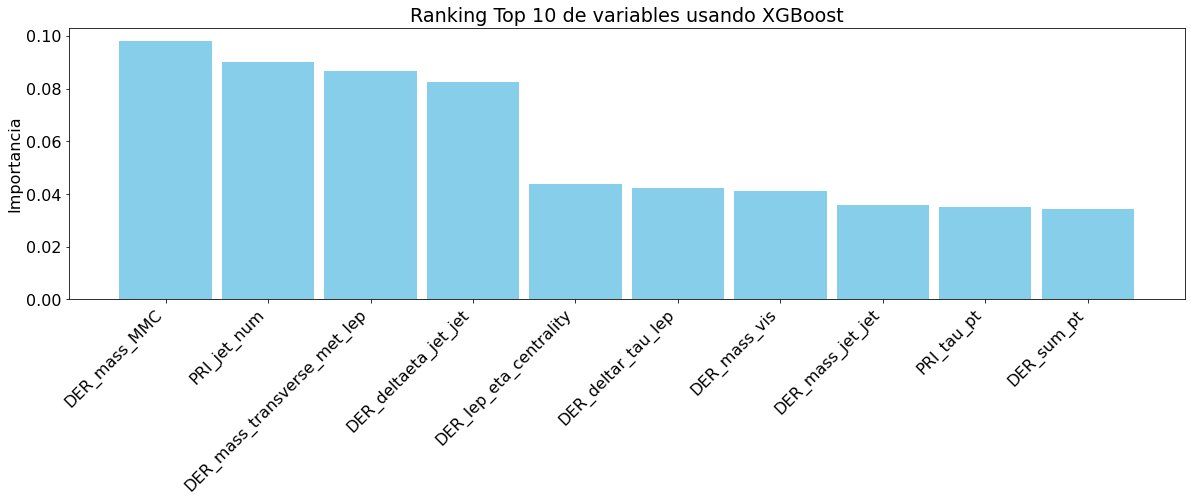

In [13]:
font = {'size'   : 16}
pyplot.rc('font', **font)
fig = plt.figure(figsize = (20, 5))


# creating the bar plot
plt.ylabel("Importancia")
plt.bar(x, y, color ='skyblue',
        width = 0.9)
plt.xticks(rotation=45, ha='right')
plt.title("Ranking Top 10 de variables usando XGBoost")
plt.show()

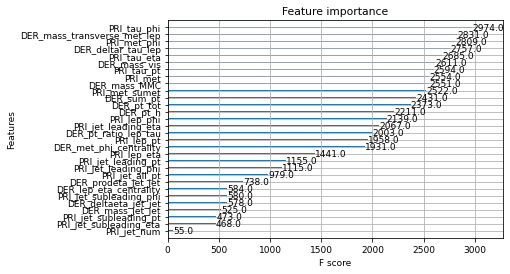

In [14]:
from xgboost import plot_importance
# plot feature importance
font = {'size'   : 9}
pyplot.rc('font', **font)
plot_importance(model)
pyplot.show()

In [15]:
X[x].head()

,DER_mass_MMC,PRI_jet_num,DER_mass_transverse_met_lep,DER_deltaeta_jet_jet,DER_lep_eta_centrality,DER_deltar_tau_lep,DER_mass_vis,DER_mass_jet_jet,PRI_tau_pt,DER_sum_pt
0,85.123,1,5.111,-999.000,-999.000,1.288,45.454,-999.000,28.827,212.788
1,70.751,3,16.532,4.446,0.545,1.221,47.178,442.881,35.467,209.956
2,-999.000,0,79.211,-999.000,-999.000,1.879,77.286,-999.000,58.913,92.329
3,74.959,0,58.796,-999.000,-999.000,2.628,58.484,-999.000,29.469,57.390
4,-999.000,0,82.701,-999.000,-999.000,2.674,109.640,-999.000,34.761,62.347


### Entrenamiento, testeo y optimizacion de parametros de DMatrix de XGBoost con las variables entregadas por XGBoost.
-------------------------------------------------------------------------------------------------------------------------------

In [16]:
X_train2 = X[x] 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train2, Y, test_size=0.3, random_state=0)

In [17]:
dtrain = xgb.DMatrix(X_train2, label=y_train2)
dtest = xgb.DMatrix(X_test2, label=y_test2)

In [18]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [19]:
modelo = xgb.train( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    evals=[(dtest, "Test")], 
    early_stopping_rounds=10 
)

[15:14:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.42924
[1]	Test-mae:0.37860
[2]	Test-mae:0.34213
[3]	Test-mae:0.31556
[4]	Test-mae:0.29595
[5]	Test-mae:0.28101
[6]	Test-mae:0.27039
[7]	Test-mae:0.26258
[8]	Test-mae:0.25688
[9]	Test-mae:0.25257
[10]	Test-mae:0.24989
[11]	Test-mae:0.24739
[12]	Test-mae:0.24607
[13]	Test-mae:0.24459
[14]	Test-mae:0.24415
[15]	Test-mae:0.24353
[16]	Test-mae:0.24334
[17]	Test-mae:0.24310
[18]	Test-mae:0.24303
[19]	Test-mae:0.24244
[20]	Test-mae:0.24216
[21]	Test-mae:0.24184
[22]	Test-mae:0.24163
[23]	Test-mae:0.24159
[24]	Test-mae:0.24157
[25]	Test-mae:0.24151
[26]	Test-mae:0.24143
[27]	Test-mae:0.24136
[28]	Test-mae:0.24129
[29]	Test-mae:0.24126
[30]	Test-mae:0.24091
[31]	Test-mae:0.24093
[32]	Test-mae:0.24074
[33]	Test-mae:0.24088
[34]	Test-mae:0.24094
[35]	Test-mae:0.24051
[36]	Test-mae:0.24062
[37]	Test-mae:0.240

In [20]:
print("Best MAE: {:.2f} with {} rounds".format(
                 modelo.best_score,
                 modelo.best_iteration+1))

Best MAE: 0.24 with 74 rounds


In [21]:
cv_results = xgb.cv( 
    params, 
    dtrain, 
    num_boost_round=num_boost_round, 
    seed=42, 
    nfold=5, 
    metrics={'mae'}, 
    early_stopping_rounds=10 
)
cv_results

[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.428392,0.000220,0.429408,0.000444
1,0.377035,0.000380,0.378966,0.000796
2,0.339612,0.000716,0.342393,0.000997
3,0.312072,0.000841,0.315647,0.001077
4,0.292032,0.000939,0.296362,0.001365
...,...,...,...,...
66,0.216313,0.000729,0.240251,0.002210
67,0.215983,0.000741,0.240194,0.002269
68,0.215724,0.000892,0.240202,0.002261
69,0.215454,0.000790,0.240191,0.002278


In [22]:
cv_results['test-mae-mean'].min()

0.2401823998362947

In [23]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [24]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with max_depth=9, min_child_weight=5
[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:14:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23633353076996846 for 21 rounds
CV with max_depth=9, min_child_weigh

[15:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:15:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23618824636086896 for 22 rounds
Best params: 11, 6, MAE: 0.23543865365404004


In [25]:
params['max_depth'] = 11
params['min_child_weight'] = 6

In [34]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [35]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with subsample=1.0, colsample=1.0
[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:58:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23504888295616982 for 22 rounds
CV with subsample=1.0, colsample=0.9
[1

[14:59:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23674548768244558 for 19 rounds
CV with subsample=0.8, colsample=0.9
[14:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:59:50] WARNING: C:/Users/Administra

In [26]:
params['subsample'] = 1.
params['colsample_bytree'] = 1.

In [37]:
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['mae'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

CV with eta=0.3
[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:00:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 0.23504888295616982 for 22 rounds

CV with eta=0.2
[15:00:42] WARNING: C:/Users/Administrator/

In [27]:
params['eta'] = .05

In [28]:
params

{'max_depth': 11,
 'min_child_weight': 6,
 'eta': 0.05,
 'subsample': 1.0,
 'colsample_bytree': 1.0,
 'objective': 'reg:linear',
 'eval_metric': 'mae'}

In [29]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

[15:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.48697
[1]	Test-mae:0.47466
[2]	Test-mae:0.46292
[3]	Test-mae:0.45182
[4]	Test-mae:0.44121
[5]	Test-mae:0.43109
[6]	Test-mae:0.42147
[7]	Test-mae:0.41228
[8]	Test-mae:0.40357
[9]	Test-mae:0.39526
[10]	Test-mae:0.38739
[11]	Test-mae:0.37982
[12]	Test-mae:0.37267
[13]	Test-mae:0.36584
[14]	Test-mae:0.35929
[15]	Test-mae:0.35320
[16]	Test-mae:0.34727
[17]	Test-mae:0.34167
[18]	Test-mae:0.33638
[19]	Test-mae:0.33133
[20]	Test-mae:0.32649
[21]	Test-mae:0.32191
[22]	Test-mae:0.31758
[23]	Test-mae:0.31343
[24]	Test-mae:0.30949
[25]	Test-mae:0.30572
[26]	Test-mae:0.30211
[27]	Test-mae:0.29872
[28]	Test-mae:0.29550
[29]	Test-mae:0.29241
[30]	Test-mae:0.28947
[31]	Test-mae:0.28660
[32]	Test-mae:0.28391
[33]	Test-mae:0.28136
[34]	Test-mae:0.27891
[35]	Test-mae:0.27665
[36]	Test-mae:0.27443
[37]	Test-mae:0.272

In [30]:
um_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[15:16:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:0.48697
[1]	Test-mae:0.47466
[2]	Test-mae:0.46292
[3]	Test-mae:0.45182
[4]	Test-mae:0.44121
[5]	Test-mae:0.43109
[6]	Test-mae:0.42147
[7]	Test-mae:0.41228
[8]	Test-mae:0.40357
[9]	Test-mae:0.39526
[10]	Test-mae:0.38739
[11]	Test-mae:0.37982
[12]	Test-mae:0.37267
[13]	Test-mae:0.36584
[14]	Test-mae:0.35929
[15]	Test-mae:0.35320
[16]	Test-mae:0.34727
[17]	Test-mae:0.34167
[18]	Test-mae:0.33638
[19]	Test-mae:0.33133
[20]	Test-mae:0.32649
[21]	Test-mae:0.32191
[22]	Test-mae:0.31758
[23]	Test-mae:0.31343
[24]	Test-mae:0.30949
[25]	Test-mae:0.30572
[26]	Test-mae:0.30211
[27]	Test-mae:0.29872
[28]	Test-mae:0.29550
[29]	Test-mae:0.29241
[30]	Test-mae:0.28947
[31]	Test-mae:0.28660
[32]	Test-mae:0.28391
[33]	Test-mae:0.28136
[34]	Test-mae:0.27891
[35]	Test-mae:0.27665
[36]	Test-mae:0.27443
[37]	Test-mae:0.272

[354]	Test-mae:0.23020
[355]	Test-mae:0.23020
[356]	Test-mae:0.23020
[357]	Test-mae:0.23018
[358]	Test-mae:0.23018
[359]	Test-mae:0.23020
[360]	Test-mae:0.23019
[361]	Test-mae:0.23018
[362]	Test-mae:0.23017
[363]	Test-mae:0.23017
[364]	Test-mae:0.23018
[365]	Test-mae:0.23018
[366]	Test-mae:0.23017
[367]	Test-mae:0.23016
[368]	Test-mae:0.23016
[369]	Test-mae:0.23015
[370]	Test-mae:0.23015
[371]	Test-mae:0.23016
[372]	Test-mae:0.23014
[373]	Test-mae:0.23014
[374]	Test-mae:0.23015
[375]	Test-mae:0.23015
[376]	Test-mae:0.23015
[377]	Test-mae:0.23014
[378]	Test-mae:0.23013
[379]	Test-mae:0.23010
[380]	Test-mae:0.23010
[381]	Test-mae:0.23011
[382]	Test-mae:0.23011
[383]	Test-mae:0.23008
[384]	Test-mae:0.23009
[385]	Test-mae:0.23008
[386]	Test-mae:0.23008
[387]	Test-mae:0.23007
[388]	Test-mae:0.23007
[389]	Test-mae:0.23005
[390]	Test-mae:0.23003
[391]	Test-mae:0.23003
[392]	Test-mae:0.23004
[393]	Test-mae:0.23003
[394]	Test-mae:0.23003
[395]	Test-mae:0.23004
[396]	Test-mae:0.23004
[397]	Test-

[711]	Test-mae:0.22958
[712]	Test-mae:0.22958
[713]	Test-mae:0.22957
[714]	Test-mae:0.22957
[715]	Test-mae:0.22957
[716]	Test-mae:0.22957
[717]	Test-mae:0.22958
[718]	Test-mae:0.22958
[719]	Test-mae:0.22958
[720]	Test-mae:0.22957
[721]	Test-mae:0.22958
[722]	Test-mae:0.22956
[723]	Test-mae:0.22956
[724]	Test-mae:0.22955
[725]	Test-mae:0.22956
[726]	Test-mae:0.22956
[727]	Test-mae:0.22956
[728]	Test-mae:0.22956
[729]	Test-mae:0.22955
[730]	Test-mae:0.22956
[731]	Test-mae:0.22956
[732]	Test-mae:0.22956
[733]	Test-mae:0.22956
[734]	Test-mae:0.22956
[735]	Test-mae:0.22957
[736]	Test-mae:0.22956
[737]	Test-mae:0.22956
[738]	Test-mae:0.22956
[739]	Test-mae:0.22955
[740]	Test-mae:0.22956
[741]	Test-mae:0.22956
[742]	Test-mae:0.22955
[743]	Test-mae:0.22955
[744]	Test-mae:0.22956
[745]	Test-mae:0.22956
[746]	Test-mae:0.22954
[747]	Test-mae:0.22953
[748]	Test-mae:0.22953
[749]	Test-mae:0.22953
[750]	Test-mae:0.22951
[751]	Test-mae:0.22952
[752]	Test-mae:0.22952
[753]	Test-mae:0.22952
[754]	Test-

In [31]:
mean_absolute_error(best_model.predict(dtest), y_test2)

0.22934536106291684

### Guardado del modelo y predicciones.
-------------------------------------------------------------------------------------------------------------------------------

In [32]:
best_model.save_model("XGBoost.model")

In [33]:
loaded_model = xgb.Booster()
loaded_model.load_model("XGBoost.model")
# And use it for predictions.
Prediccion = loaded_model.predict(dtest) #revisar la salida hecha por XGBoost

[15:17:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [34]:
Prediccion.min()

-0.23196599

In [35]:
Prediccion.max()

1.1904342

In [36]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay

In [37]:
testing_list =[]
for i in  np.linspace(0.1,0.9,9):
    d = {}
    y_p = Prediccion >= i
    print("Threshold:",i)
    cm = confusion_matrix(y_test2,y_p)
    d["th"] = i
    d["F1"] = np.round(f1_score(y_test2,y_p),2)
    d["Prec"] = np.round(precision_score(y_test2,y_p),2)
    d["Rec"] = np.round(recall_score(y_test2,y_p),2)
    d["Acc"] = np.round(accuracy_score(y_test2,y_p),2)
    d["RocAuc"] = np.round(roc_auc_score(y_test2,y_p),2)
    testing_list.append(d)

Threshold: 0.1
Threshold: 0.2
Threshold: 0.30000000000000004
Threshold: 0.4
Threshold: 0.5
Threshold: 0.6
Threshold: 0.7000000000000001
Threshold: 0.8
Threshold: 0.9


# Metricas para cada umbral.
- th: umbral
-------------------------------------------------------------------------------------------------------------------------------

In [38]:
testing_metrics_pd = pd.DataFrame(testing_list)
testing_metrics_pd

,th,F1,Prec,Rec,Acc,RocAuc
0,0.1,0.67,0.52,0.96,0.68,0.75
1,0.2,0.72,0.60,0.91,0.76,0.80
2,0.3,0.75,0.67,0.85,0.81,0.82
3,0.4,0.76,0.73,0.79,0.83,0.82
4,0.5,0.75,0.78,0.72,0.84,0.81
5,0.6,0.72,0.82,0.65,0.83,0.79
6,0.7,0.68,0.86,0.56,0.82,0.76
7,0.8,0.60,0.90,0.45,0.80,0.71
8,0.9,0.44,0.93,0.28,0.75,0.64


In [39]:
print(testing_metrics_pd.to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 th &   F1 &  Prec &  Rec &  Acc &  RocAuc \\
\midrule
0.1 & 0.67 &  0.52 & 0.96 & 0.68 &    0.75 \\
0.2 & 0.72 &  0.60 & 0.91 & 0.76 &    0.80 \\
0.3 & 0.75 &  0.67 & 0.85 & 0.81 &    0.82 \\
0.4 & 0.76 &  0.73 & 0.79 & 0.83 &    0.82 \\
0.5 & 0.75 &  0.78 & 0.72 & 0.84 &    0.81 \\
0.6 & 0.72 &  0.82 & 0.65 & 0.83 &    0.79 \\
0.7 & 0.68 &  0.86 & 0.56 & 0.82 &    0.76 \\
0.8 & 0.60 &  0.90 & 0.45 & 0.80 &    0.71 \\
0.9 & 0.44 &  0.93 & 0.28 & 0.75 &    0.64 \\
\bottomrule
\end{tabular}



In [40]:
fpr, tpr, ths = roc_curve(y_test2,  Prediccion)
auc_ = auc(fpr, tpr)

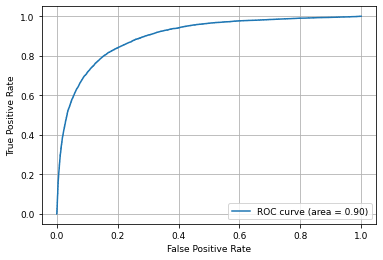

In [41]:
plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.grid()
plt.show()

In [42]:
for i in  np.linspace(0.1,0.9,9):
    print(i)
    y_p = Prediccion >= i
    print(classification_report(y_test2, y_p))
    f1 = f1_score(y_test2, y_p)
    prec = precision_score(y_test2, y_p)
    rec = recall_score(y_test2, y_p)
    acc = accuracy_score(y_test2, y_p)
    cm=confusion_matrix(y_test2, y_p)
    print("Matriz de confusión: ")
    print(cm)
    print("----------------------------------------------------------")
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    print("----------------------------------------------------------")

0.1
              precision    recall  f1-score   support

           0       0.96      0.55      0.70     19828
           1       0.52      0.96      0.67     10172

    accuracy                           0.68     30000
   macro avg       0.74      0.75      0.68     30000
weighted avg       0.81      0.68      0.69     30000

Matriz de confusión: 
[[10818  9010]
 [  445  9727]]
----------------------------------------------------------
F1: 0.67  -- prec: 0.52  -- recall: 0.96  -- acc: 0.68
----------------------------------------------------------
0.2
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     19828
           1       0.60      0.91      0.72     10172

    accuracy                           0.76     30000
   macro avg       0.77      0.80      0.76     30000
weighted avg       0.82      0.76      0.77     30000

Matriz de confusión: 
[[13708  6120]
 [  937  9235]]
----------------------------------------------------------


In [43]:
umbral = 0.4

In [44]:
maskSignal=Prediccion>umbral

In [45]:
predicBin=[]
for i in maskSignal:
    if(i==True):
        predicBin.append(1)
    else:
        predicBin.append(0)
predicBin

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,


In [46]:
import numpy as np

In [47]:
npPredict=np.array(predicBin)

In [48]:
cm=confusion_matrix(y_test2, npPredict)

In [49]:
cm

array([[16855,  2973],
       [ 2093,  8079]], dtype=int64)

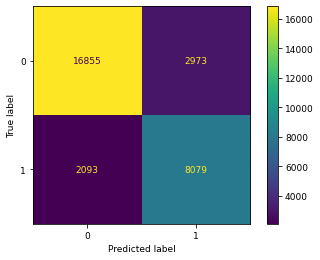

In [50]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [51]:
f1= f1_score(y_test2, npPredict)

In [52]:
f1

0.7613079532604599

In [53]:
prec=precision_score(y_test2, npPredict)

In [54]:
prec

0.7309989142236699

In [55]:
rec=recall_score(y_test2, npPredict)

In [56]:
rec

0.7942390876917027

In [57]:
accu=accuracy_score(y_test2, npPredict)
accu

0.8311333333333333

In [58]:
print(classification_report(y_test2, npPredict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87     19828
           1       0.73      0.79      0.76     10172

    accuracy                           0.83     30000
   macro avg       0.81      0.82      0.82     30000
weighted avg       0.84      0.83      0.83     30000



In [59]:
print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)

F1: 0.76  -- prec: 0.73  -- recall: 0.79  -- acc: 0.75
